# MAT 388, HW4

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, Conv1D, Conv2D,  Embedding, Flatten
import tensorflow_datasets as tfds


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

import matplotlib.pyplot as plt
from io import BytesIO
import urllib.request
from scipy.io import loadmat
from scipy.stats import t
from collections import Counter

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold




## Q1

For this question we are goint to use [CELEB_A](https://www.tensorflow.org/datasets/catalog/celeb_a) dataset through [tensorflow datasets](https://www.tensorflow.org/datasets).

1. Ingest the data, and select 10000 images from the dataset. Put the images under a variable called `X` and class labels (attributes) into `y`.
2. Build a neural network model for `X` against `Glasses` attribute in `y`.
3. Test the accuracy of your model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)
4. Repeat Steps 2 and 3 for `Male` and `Bangs` attributes.
5. Compare your results for `Glasses`, `Male` and `Bangs`. Which one is better? Why? Explain.

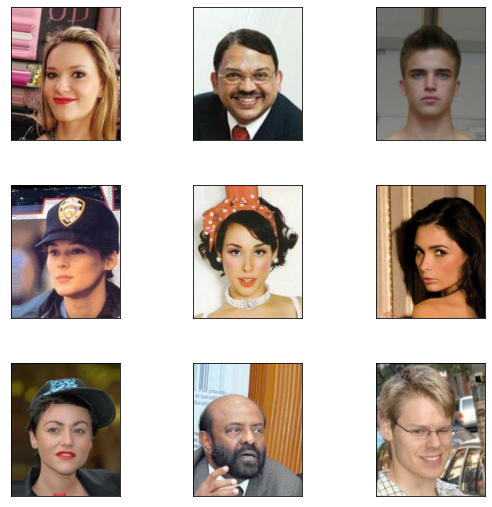

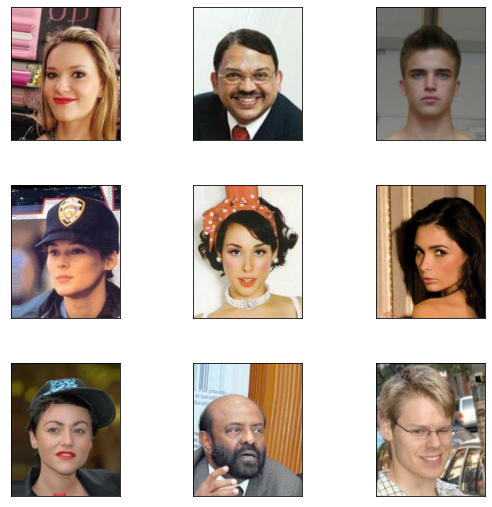

In [3]:
(train, test), info = tfds.load('celeb_a', split=['train','test'], with_info=True, shuffle_files=True)
tfds.show_examples(train,info)

In [4]:
def tfGetData(df,N,attr):
    X_train = []
    y_train = []
    fn = {True: 1, False: 0}
    for u in df.take(N):
        X_train.append(u['image'].numpy().reshape((218,178,3)))
        y_train.append(fn.get(u['attributes'][attr].numpy(),0))
    return X_train,y_train

In [5]:
X_train_glass,y_train_glass = tfGetData(train,10000,'Eyeglasses')
X_train_male,y_train_male = tfGetData(train,10000,'Male')
X_train_bangs,y_train_bangs = tfGetData(train,10000,'Bangs')


In [6]:
X_train_glass=np.array(X_train_glass)
y_train_glass=np.array(y_train_glass)



In [7]:
X_train_male=np.array(X_train_male)
y_train_male=np.array(y_train_male)

In [8]:
X_train_bangs=np.array(X_train_bangs)
y_train_bangs=np.array(y_train_bangs)

In [12]:
def experiment(xx,yy):
    kfold = KFold(n_splits=5, shuffle=True)
    fold_no = 1

    acc_per_fold = []
    loss_per_fold = []

    for train, test in kfold.split(xx, yy):
        model1 = Sequential()
        model1.add(Conv2D(3, 2, activation='softmax', input_shape=(218,178,3))) 
        model1.add(Flatten()) # image al vektöre dönüştür.
        model1.add(Dense(256, activation='relu')) # 8x8 olduğu için 64 lük vektör. senin dimension arttırman gerekiyor. 
        model1.add(Dropout(0.25))
        model1.add(Dense(128, activation='relu')) 
        model1.add(Dense(1, activation='sigmoid'))
        model1.compile(loss = 'binary_crossentropy', 
              optimizer = 'adamax', 
              metrics = ['accuracy'])

        model1.compile(loss='mape', optimizer='adam', metrics = ['mse'])

        print('------------------------------------------------------------------------')
        print(f'Training for fold {fold_no} ...')

        history = model1.fit(xx[train], yy[train],
                  batch_size=50,
                  epochs=3,
                  verbose=1)

        scores = model1.evaluate(xx[test], yy[test], verbose=0)
        print(f'Score for fold {fold_no}: {model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])

        fold_no = fold_no + 1
    return acc_per_fold,loss_per_fold  



In [13]:
acc_glas,loss_glas = experiment(X_train_glass,y_train_glass)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/3
160/160 [==============================] - 51s 311ms/step - loss: 2694727.0000 - mse: 0.0683
Epoch 2/3
160/160 [==============================] - 54s 339ms/step - loss: 6.7250 - mse: 0.0672
Epoch 3/3
160/160 [==============================] - 51s 320ms/step - loss: 6.7250 - mse: 0.0672
Score for fold 1: loss of 6.650000095367432; mse of 6.650000065565109%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/3
160/160 [==============================] - 54s 326ms/step - loss: 2207566.0000 - mse: 0.0694
Epoch 2/3
160/160 [==============================] - 53s 330ms/step - loss: 6.8750 - mse: 0.0688
Epoch 3/3
160/160 [==============================] - 52s 324ms/step - loss: 6.8750 - mse: 0.0688
Score for fold 2: loss of 6.050000190734863; mse of 6.049999967217445%
----------------------------------------------------------------------

In [14]:
acc_glass= np.array(acc_glas)

In [15]:
t.interval(0.95,len(acc_glass)-1,loc=acc_glass.mean(),scale=acc_glass.var())

(6.025883888931355, 7.394116336374203)

In [16]:
acc_male,loss_male = experiment(X_train_male,y_train_male)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/3
160/160 [==============================] - 50s 297ms/step - loss: 2191975.0000 - mse: 0.4196
Epoch 2/3
160/160 [==============================] - 48s 302ms/step - loss: 42.0500 - mse: 0.4205
Epoch 3/3
160/160 [==============================] - 51s 321ms/step - loss: 42.0500 - mse: 0.4205
Score for fold 1: loss of 41.29999923706055; mse of 41.29999876022339%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/3
160/160 [==============================] - 55s 336ms/step - loss: 3298872.0000 - mse: 0.4211
Epoch 2/3
160/160 [==============================] - 52s 325ms/step - loss: 42.0375 - mse: 0.4204
Epoch 3/3
160/160 [==============================] - 55s 345ms/step - loss: 42.0375 - mse: 0.4204
Score for fold 2: loss of 41.349998474121094; mse of 41.350001096725464%
----------------------------------------------------------------

In [17]:
accc_male= np.array(acc_male)

In [18]:
t.interval(0.95,len(accc_male)-1,loc=accc_male.mean(),scale=accc_male.var())

(40.63116496422615, 43.16883498809013)

In [19]:
acc_bangs,loss_bangs = experiment(X_train_bangs,y_train_bangs)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/3
160/160 [==============================] - 47s 291ms/step - loss: 3306087.2500 - mse: 0.1452
Epoch 2/3
160/160 [==============================] - 47s 294ms/step - loss: 14.3875 - mse: 0.1439
Epoch 3/3
160/160 [==============================] - 49s 305ms/step - loss: 14.3875 - mse: 0.1439
Score for fold 1: loss of 16.950000762939453; mse of 16.94999933242798%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/3
160/160 [==============================] - 48s 291ms/step - loss: 2234203.5000 - mse: 0.1511
Epoch 2/3
160/160 [==============================] - 48s 300ms/step - loss: 15.1250 - mse: 0.1513
Epoch 3/3
160/160 [==============================] - 49s 309ms/step - loss: 15.1250 - mse: 0.1513
Score for fold 2: loss of 14.0; mse of 14.000000059604645%
------------------------------------------------------------------------
Trai

In [20]:
accc_bangs= np.array(acc_bangs)

In [21]:
t.interval(0.95,len(accc_bangs)-1,loc=accc_bangs.mean(),scale=accc_bangs.var())

(11.848688077739403, 17.951311516949012)

**Since it is the male data with the highest accuracy, we can say that that model works best.**

## Q2

For this question use the [Hyperspectral Image of Kennedy Space Center](https://www.ehu.eus/ccwintco/index.php/Hyperspectral_Remote_Sensing_Scenes#Kennedy_Space_Center_.28KSC.29).

1. Ingest the image data directly from the web. (No local files!)
2. Ingest the ground truth data directly from the web. (No local files!)
4. Build a convolutional neural network (preferably using [this](https://keras.io/api/layers/convolution_layers/) and/or [this](https://keras.io/api/layers/recurrent_layers/conv_lstm2d/)) model.
5. Test the accuracy of the model using a 5-fold cross-validation. (I want a %95 confidence interval on the returned result using a t-test as I did in one of my lectures.)

In [475]:
url_x = 'http://www.ehu.es/ccwintco/uploads/2/26/KSC.mat'
url_y = 'http://www.ehu.es/ccwintco/uploads/a/a6/KSC_gt.mat'
with urllib.request.urlopen(url_x) as f:
    x = f.read()
    
with urllib.request.urlopen(url_y) as f:
    y = f.read()    
    
x = loadmat(BytesIO(x))
y = loadmat(BytesIO(y))

x = x["KSC"]
y = y["KSC_gt"]


In [476]:
xx= x.reshape(512*614,176)

**There are 176 images in the data. Before inserting the data into the model, we multiply the first 2 dimensions and reshape them.**

In [477]:
xx.shape

(314368, 176)

In [478]:
y.shape

(512, 614)

In [479]:
yy= y.reshape([512*614])

In [480]:
yy.shape

(314368,)

In [481]:
binarizer = LabelBinarizer()
Y = binarizer.fit_transform(yy)
Y.shape

(314368, 14)

**There are 14 different types of labels in the data. So we used Label binarizer.**

In [483]:
kfold = KFold(n_splits=5, shuffle=True)
fold_no = 1

acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(xx, Y):
    model2 = Sequential()
    model2.add(Conv1D(3, 2, activation='softmax', input_shape=(xx.shape[1],1))) 
    model2.add(Flatten()) 
    model2.add(Dense(256, activation='relu'))  
    model2.add(Dropout(0.25))
    model2.add(Dense(128, activation='relu')) 
    model2.add(Dense(14, activation='sigmoid'))
    model2.compile(loss = 'binary_crossentropy',
              optimizer = 'adamax', 
              metrics = ['accuracy'])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    history = model2.fit(xx[train], Y[train],
              batch_size=50,
              epochs=15,
              verbose=1)
    
    scores = model2.evaluate(xx[test], Y[test], verbose=0)
    print(f'Score for fold {fold_no}: {model2.metrics_names[0]} of {scores[0]}; {model2.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    fold_no = fold_no + 1
    

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
5030/5030 [==============================] - 20s 4ms/step - loss: 0.0162 - accuracy: 0.9829
Epoch 2/15
5030/5030 [==============================] - 20s 4ms/step - loss: 0.0151 - accuracy: 0.9833
Epoch 3/15
5030/5030 [==============================] - 21s 4ms/step - loss: 0.0149 - accuracy: 0.9833
Epoch 4/15
5030/5030 [==============================] - 22s 4ms/step - loss: 0.0147 - accuracy: 0.9833
Epoch 5/15
5030/5030 [==============================] - 22s 4ms/step - loss: 0.0141 - accuracy: 0.9833
Epoch 6/15
5030/5030 [==============================] - 21s 4ms/step - loss: 0.0131 - accuracy: 0.9833
Epoch 7/15
5030/5030 [==============================] - 21s 4ms/step - loss: 0.0125 - accuracy: 0.9833
Epoch 8/15
5030/5030 [==============================] - 22s 4ms/step - loss: 0.0121 - accuracy: 0.9833
Epoch 9/15
5030/5030 [==============================] - 22s 4ms/step - loss: 0.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5030/5030 [==============================] - 21s 4ms/step - loss: 0.0112 - accuracy: 0.9835
Epoch 13/15
5030/5030 [==============================] - 22s 4ms/step - loss: 0.0112 - accuracy: 0.9835
Epoch 14/15
5030/5030 [==============================] - 23s 4ms/step - loss: 0.0111 - accuracy: 0.9835
Epoch 15/15
5030/5030 [==============================] - 24s 5ms/step - loss: 0.0110 - accuracy: 0.9835
Score for fold 4: loss of 0.011250359937548637; accuracy of 98.3013391494751%
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/15
5030/5030 [==============================] - 23s 4ms/step - loss: 0.0151 - accuracy: 0.9831
Epoch 2/15
5030/5030 [==============================] - 22s 4ms/step - loss: 0.0129 - accuracy: 0.9833
Epoch 3/15
5030/5030 [==============================] - 22s 4ms/step - loss: 0.0122 - accuracy: 0.9833
Epoch 4/15
5030/5030 [==============================] - 22s 4ms/step - loss: 0.0119 - accuracy: 0.9833
Epoch 5/1

In [488]:
acc=np.array(acc_per_fold)
acc

array([98.38088751, 98.33635688, 98.3204484 , 98.30133915, 98.37132096])

In [489]:
t.interval(0.95,len(acc)-1,loc=acc.mean(),scale=acc.var())

(98.3395598105795, 98.34458134847812)

## Q3

For this question we are going to use the time series of [Wheat Futures](https://finance.yahoo.com/quote/ZW=F/) from Yahoo Finance.

1. Ingest the data using [yfinance](https://pypi.org/project/yfinance/) Start from Jan 1, 2010 until Dec 31, 2021.
2. Construct [a RNN and/or a LSTM](https://keras.io/api/layers/recurrent_layers/) model on the data.
3. Test your model on the wheat futures data from Jan 1, 2022 to today using a 5-fold cross-validation. Did your model work? Explain.

In [328]:
train = yf.download('ZW=F', start='2010-01-01', end='2021-12-31')
train

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00-05:00,544.75,561.25,544.00,557.75,557.75,41278
2010-01-05 00:00:00-05:00,556.75,561.50,552.00,553.00,553.00,36720
2010-01-06 00:00:00-05:00,552.00,567.75,551.00,567.25,567.25,38503
2010-01-07 00:00:00-05:00,566.50,568.00,556.00,557.75,557.75,33873
2010-01-08 00:00:00-05:00,557.50,570.00,545.25,568.50,568.50,33873
...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,812.50,820.50,808.25,814.75,814.75,36615
2021-12-27 00:00:00-05:00,817.50,824.00,802.50,804.00,804.00,30210
2021-12-28 00:00:00-05:00,805.75,808.00,781.75,783.50,783.50,41877


In [329]:
test = yf.download('ZW=F', start='2022-01-01', end=date.today())
test

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,774.00,782.25,752.75,758.00,758.00,42116
2022-01-04 00:00:00-05:00,758.00,771.50,756.25,770.00,770.00,43220
2022-01-05 00:00:00-05:00,771.00,771.50,756.00,760.75,760.75,40236
2022-01-06 00:00:00-05:00,761.75,762.00,736.00,746.00,746.00,64426
2022-01-07 00:00:00-05:00,748.00,760.75,735.50,758.50,758.50,58463
...,...,...,...,...,...,...
2022-12-12 00:00:00-05:00,733.00,733.00,733.00,733.00,733.00,262
2022-12-13 00:00:00-05:00,741.00,742.50,728.75,728.75,728.75,103
2022-12-14 00:00:00-05:00,728.25,728.25,728.25,728.25,728.25,41587


In [330]:

x_train = train.loc[:,train.columns != "Close"]
x_test = test.loc[:,test.columns != "Close"]

y_train = pd.DataFrame(train["Close"])
y_test = pd.DataFrame(test["Close"])

In [331]:
# Merge inputs and targets
xx = np.concatenate((x_train, x_test), axis=0)
yy = np.concatenate((y_train, y_test), axis=0)

In [332]:
kfold = KFold(n_splits=5, shuffle=True)
fold_no = 1

acc_per_fold = []
loss_per_fold = []

for train, test in kfold.split(xx, yy):
    model3 = Sequential()
    model3.add(LSTM(50, return_sequences=True, input_shape=(5,1)))
    model3.add(Dropout(0.1))
    model3.add(Dense(100, activation='relu'))
    model3.add(Dropout(0.05))
    model3.add(Dense(1, activation = 'relu'))

    model3.compile(loss='mape', optimizer='adam', metrics = ['mse'])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
    history = model3.fit(xx[train], yy[train],
              batch_size=50,
              epochs=15,
              verbose=1)
    
    scores = model3.evaluate(xx[test], yy[test], verbose=0)
    print(f'Score for fold {fold_no}: {model3.metrics_names[0]} of {scores[0]}; {model3.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    
    fold_no = fold_no + 1
    


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
53/53 [==============================] - 2s 4ms/step - loss: 99.3556 - mse: 381709.9375
Epoch 2/15
53/53 [==============================] - 0s 4ms/step - loss: 94.8601 - mse: 351731.7188
Epoch 3/15
53/53 [==============================] - 0s 4ms/step - loss: 79.3163 - mse: 259722.1875
Epoch 4/15
53/53 [==============================] - 0s 4ms/step - loss: 51.5438 - mse: 133351.1094
Epoch 5/15
53/53 [==============================] - 0s 4ms/step - loss: 24.9637 - mse: 49940.0859
Epoch 6/15
53/53 [==============================] - 0s 4ms/step - loss: 20.4915 - mse: 32775.4492
Epoch 7/15
53/53 [==============================] - 0s 4ms/step - loss: 20.4606 - mse: 31470.5820
Epoch 8/15
53/53 [==============================] - 0s 4ms/step - loss: 20.2550 - mse: 31668.1387
Epoch 9/15
53/53 [==============================] - 0s 4ms/step - loss: 18.1781 - mse: 27996.0859
Epoch 10/15
53/53

In [312]:
acc_per_fold

[1595878.41796875,
 1739700.1953125,
 1644179.1015625,
 1764818.9453125,
 1519778.80859375]

In [313]:
loss_per_fold

[12.51298713684082,
 13.741693496704102,
 12.499051094055176,
 13.299909591674805,
 12.800004959106445]

## Q4

For this question, we are going to use [Consumer Complaints Dataset](https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv).

1. Ingest the dataset. We are only going to use the columns `Issue` and `Timely Response?`.
2. Convert the values in the issue column to vectors using [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from `scikit-learn`. Similarly, binarize the column `Timely Response` using [Label Binarizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).
3. Split your dataset into train and test.
3. Construct an an appropriate neural network model on the train set.
4. Test your model on the test set. Did your model work? Explain.

In [357]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression


In [432]:
data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/26k-consumer-complaints.csv")

In [433]:
data

,Unnamed: 0,Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
0,0,1291006,Debt collection,NaN,Communication tactics,Frequent or repeated calls,TX,76119.0,2015-03-19,2015-03-19,"Premium Asset Services, LLC",In progress,Yes,NaN
1,1,1290580,Debt collection,Medical,Cont'd attempts collect debt not owed,Debt is not mine,TX,77479.0,2015-03-19,2015-03-19,Accounts Receivable Consultants Inc.,Closed with explanation,Yes,NaN
2,2,1290564,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,MA,2127.0,2015-03-19,2015-03-19,RBS Citizens,Closed with explanation,Yes,Yes
3,3,1291615,Credit card,NaN,Other,NaN,CA,92592.0,2015-03-19,2015-03-19,Navy FCU,In progress,Yes,NaN
4,4,1292165,Debt collection,Non-federal student loan,Cont'd attempts collect debt not owed,Debt resulted from identity theft,NaN,43068.0,2015-03-19,2015-03-19,Transworld Systems Inc.,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,28151,1178184,Debt collection,NaN,Cont'd attempts collect debt not owed,Debt is not mine,TX,75201.0,2015-01-01,2015-01-02,"Enhanced Recovery Company, LLC",Closed with non-monetary relief,Yes,No
28152,28152,1178183,Consumer loan,Vehicle loan,Taking out the loan or lease,NaN,GA,30043.0,2015-01-01,2015-01-07,DriveTime,Closed with explanation,Yes,NaN
28153,28153,1178182,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,MN,55105.0,2015-01-01,2015-01-02,Regions,Closed with non-monetary relief,Yes,No
28154,28154,1178181,Payday loan,NaN,Can't stop charges to bank account,NaN,CA,92509.0,2015-01-01,2015-01-07,Moneytree Inc,Closed with explanation,Yes,NaN


In [434]:
issue = data["Issue"].values.astype("U")
vectorizer = CountVectorizer()
X= vectorizer.fit_transform(issue)
xx = X.toarray()

In [435]:
xx

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [436]:
data["Timely response?"]

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
28151    Yes
28152    Yes
28153    Yes
28154    Yes
28155    Yes
Name: Timely response?, Length: 28156, dtype: object

In [437]:
lb = preprocessing.LabelBinarizer()
y = lb.fit_transform(data["Timely response?"])

In [438]:
y.shape

(28156, 1)

In [439]:
xx.shape

(28156, 188)

In [440]:
X_train, X_test, Y_train, Y_test = train_test_split(xx,y,train_size=0.7)

In [441]:
X_train.shape

(19709, 188)

In [442]:
Y_train.shape

(19709, 1)

In [443]:
model_con = Sequential() 
model_con.add(Dense(128, activation = "relu", input_shape = (X_train.shape[1],))) 
model_con.add(Dense(32, activation = "relu"))
model_con.add(Dropout(0.2))
model_con.add(Dense(16, activation = "relu"))
model_con.add(Dense(1, activation = 'sigmoid'))
model_con.compile(loss = 'binary_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy'])

In [444]:
model_con.fit(X_train, Y_train,
          batch_size = 8,
          epochs = 15,
          validation_data = (X_test, Y_test))

Epoch 1/15
2464/2464 [==============================] - 4s 2ms/step - loss: 0.1180 - accuracy: 0.9745 - val_loss: 0.1107 - val_accuracy: 0.9749
Epoch 2/15
2464/2464 [==============================] - 4s 1ms/step - loss: 0.1083 - accuracy: 0.9746 - val_loss: 0.1055 - val_accuracy: 0.9749
Epoch 3/15
2464/2464 [==============================] - 4s 1ms/step - loss: 0.1072 - accuracy: 0.9746 - val_loss: 0.1093 - val_accuracy: 0.9749
Epoch 4/15
2464/2464 [==============================] - 4s 2ms/step - loss: 0.1068 - accuracy: 0.9746 - val_loss: 0.1067 - val_accuracy: 0.9749
Epoch 5/15
2464/2464 [==============================] - 4s 2ms/step - loss: 0.1052 - accuracy: 0.9746 - val_loss: 0.1086 - val_accuracy: 0.9749
Epoch 6/15
2464/2464 [==============================] - 4s 2ms/step - loss: 0.1060 - accuracy: 0.9746 - val_loss: 0.1075 - val_accuracy: 0.9749
Epoch 7/15
2464/2464 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9746 - val_loss: 0.1068 - val_accuracy:

In [460]:
y_pred_con = model_con.predict(X_test).argmax(axis=1)
yy_test_con = Y_test.argmax(axis=1)
confusion_matrix(yy_test_con,y_pred_con)

264/264 [==============================] - 0s 762us/step


array([[8447]], dtype=int64)

In [461]:
print(classification_report(yy_test_con,y_pred_con))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8447

    accuracy                           1.00      8447
   macro avg       1.00      1.00      1.00      8447
weighted avg       1.00      1.00      1.00      8447



In [451]:
loss, accuracy = model_con.evaluate(X_test, Y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.2f}')

264/264 [==============================] - 0s 936us/step - loss: 0.1070 - accuracy: 0.9749
Test loss: 0.1070, Test accuracy: 0.97


In [452]:
np.unique(y_pred)

array([0], dtype=int64)

In [472]:
y_pred_con

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Although the accuracy seems high, the model predicts all values the same. So a constant model was created. The model does not work.**

In [464]:
modelLR=LogisticRegression()
modelLR.fit(X_train,Y_train)

C:\Users\Alperen Usta\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [465]:
y_predLR = modelLR.predict(X_test)
yy_test_LR = Y_test.argmax(axis=1)
confusion_matrix(yy_test_LR,y_predLR)

array([[   0, 8447],
       [   0,    0]], dtype=int64)

In [457]:
y_predLR.shape,yy_test_LR.shape

((8447,), (8447,))

**I also tried with logistic regression. The result is the same.**